# NYC Complaints Analysis - Mapping with Folium
## Cleaning and Map visualization with Folium and GeoJson 
- 311 complaints in NYC
- 100K rows within the year 2019, 40+ attributes/columns
- Cleaning function for zip codes
- Few queries for specifics
- Map for incident density, per zip codes

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# full data source on https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
nyc_311 = pd.read_csv('data/nyc_311_data_subset-2.csv',index_col=0,dtype={'landmark': object,'vehicle_type': object,
        'incident_zip': object})

In [5]:
nyc_311.head()

,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,...,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,vehicle_type,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,4.102260e+09,QUEENS,NaN,NaN,NaN,JAMAICA,2019-01-06T13:06:59.000,...,The Police Department responded to the complai...,NaN,Closed,105 AVENUE,NaN,NaN,41352433,NaN,1043267.0,194959.0
1,ADDRESS,NYPD,New York City Police Department,4.100860e+09,QUEENS,NaN,NaN,NaN,JAMAICA,2019-01-12T23:20:05.000,...,The Police Department responded to the complai...,NaN,Closed,WALTHAM STREET,NaN,NaN,41407968,NaN,1039186.0,191847.0
2,ADDRESS,DFTA,Department for the Aging,4.066900e+09,QUEENS,NaN,NaN,NaN,FLUSHING,2019-02-21T09:37:06.000,...,The Department for the Aging contacted you and...,NaN,Closed,NaN,NaN,NaN,41658034,NaN,NaN,NaN
3,ADDRESS,NYPD,New York City Police Department,4.137450e+09,QUEENS,NaN,NaN,NaN,ROSEDALE,2019-05-05T02:20:18.000,...,The Police Department responded to the complai...,NaN,Closed,148 AVENUE,NaN,NaN,42587192,NaN,1055616.0,177905.0
4,ADDRESS,DEP,Department of Environmental Protection,1.008398e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-04-10T11:16:00.000,...,The Department of Environmental Protection det...,NaN,Closed,WEST 38 STREET,NaN,NaN,42180774,NaN,988485.0,213174.0


In [6]:
nyc_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   address_type                    97774 non-null   object 
 1   agency                          100000 non-null  object 
 2   agency_name                     100000 non-null  object 
 3   bbl                             82780 non-null   float64
 4   borough                         100000 non-null  object 
 5   bridge_highway_direction        197 non-null     object 
 6   bridge_highway_name             197 non-null     object 
 7   bridge_highway_segment          251 non-null     object 
 8   city                            96353 non-null   object 
 9   closed_date                     95178 non-null   object 
 10  community_board                 100000 non-null  object 
 11  complaint_type                  100000 non-null  object 
 12  created_date     

In [7]:
def mostly_missing(df, level=0.5): 
    ans2=df.isnull().sum()/100000
    
#     '''
#     This function accepts a DataFrame
#     and returns a series with the values
#     for the features missing a larger percentage
#     than the threshold value.
#     '''
    return ans2[ans2>0.5]

mostly_missing(nyc_311)

bridge_highway_direction    0.99803
bridge_highway_name         0.99803
bridge_highway_segment      0.99749
due_date                    0.59381
facility_type               0.69945
intersection_street_1       0.89402
intersection_street_2       0.89468
landmark                    0.99976
road_ramp                   0.99803
taxi_company_borough        0.99929
taxi_pick_up_location       0.99681
vehicle_type                0.99995
dtype: float64

In [8]:
# checked the date column names first
import datetime
def date_timer(df):
    df['closed_date'] = pd.to_datetime(df['closed_date'], format='%Y-%m-%dT%H:%M:%S.%f')
    df['created_date'] = pd.to_datetime(df['created_date'], format='%Y-%m-%dT%H:%M:%S.%f')
    df['due_date'] = pd.to_datetime(df['due_date'], format='%Y-%m-%dT%H:%M:%S.%f')
    df['resolution_action_updated_date'] = pd.to_datetime(df['resolution_action_updated_date'], format='%Y-%m-%dT%H:%M:%S.%f')
    
    '''
    This function takes in a DataFrame
    and looks for any column containing the word "date".
    These columns are changed to datetime datatypes where possible,
    and the new updated dataframe is returned.
    '''
    return

date_timer(nyc_311)
df_copy=nyc_311
display(df_copy)

,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,...,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,vehicle_type,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,4.102260e+09,QUEENS,NaN,NaN,NaN,JAMAICA,2019-01-06 13:06:59,...,The Police Department responded to the complai...,NaN,Closed,105 AVENUE,NaN,NaN,41352433,NaN,1043267.0,194959.0
1,ADDRESS,NYPD,New York City Police Department,4.100860e+09,QUEENS,NaN,NaN,NaN,JAMAICA,2019-01-12 23:20:05,...,The Police Department responded to the complai...,NaN,Closed,WALTHAM STREET,NaN,NaN,41407968,NaN,1039186.0,191847.0
2,ADDRESS,DFTA,Department for the Aging,4.066900e+09,QUEENS,NaN,NaN,NaN,FLUSHING,2019-02-21 09:37:06,...,The Department for the Aging contacted you and...,NaN,Closed,NaN,NaN,NaN,41658034,NaN,NaN,NaN
3,ADDRESS,NYPD,New York City Police Department,4.137450e+09,QUEENS,NaN,NaN,NaN,ROSEDALE,2019-05-05 02:20:18,...,The Police Department responded to the complai...,NaN,Closed,148 AVENUE,NaN,NaN,42587192,NaN,1055616.0,177905.0
4,ADDRESS,DEP,Department of Environmental Protection,1.008398e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-04-10 11:16:00,...,The Department of Environmental Protection det...,NaN,Closed,WEST 38 STREET,NaN,NaN,42180774,NaN,988485.0,213174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ADDRESS,DOB,Department of Buildings,3.053948e+09,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2019-05-10 00:00:00,...,The Department of Buildings investigated this ...,NaN,Closed,DAHILL ROAD,NaN,NaN,42427732,NaN,990124.0,170287.0
99996,INTERSECTION,DOT,Department of Transportation,NaN,QUEENS,NaN,NaN,NaN,Jamaica,2019-04-17 08:06:00,...,The Department of Transportation inspected thi...,NaN,Closed,NaN,NaN,NaN,42176998,NaN,1037874.0,196781.0
99997,ADDRESS,DEP,Department of Environmental Protection,2.028820e+09,BRONX,NaN,NaN,NaN,BRONX,2019-02-26 10:17:00,...,The Department of Environmental Protection sen...,NaN,Closed,RICHMAN PLAZA,NaN,NaN,41822289,NaN,1005625.0,249604.0
99998,ADDRESS,NYPD,New York City Police Department,3.060220e+09,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2019-03-10 05:12:23,...,The Police Department responded to the complai...,NaN,Closed,10 AVENUE,NaN,NaN,41919521,NaN,979013.0,165028.0


In [9]:
# Top 5 per agency
df_copy.groupby('agency_name').size().sort_values(ascending = False).head(5)

agency_name
New York City Police Department                       26191
Department of Housing Preservation and Development    24975
Department of Transportation                          10854
Department of Sanitation                               9325
Department of Environmental Protection                 6900
dtype: int64

In [10]:
# Number of DOE incidents in Queens
agency_borough = df_copy.groupby(['agency', 'borough']).size().unstack()
agency_borough.loc['DOE', 'QUEENS']

8.0

In [14]:
# Work with zip codes; int zips, delete extensions, 1000<zip>19999 and drop null values 
def fix_zip(input_zip):
    try:
        input_zip = int(float(input_zip))
    except:
        try:
            input_zip = int(input_zip.split('-')[0])
        except:
            return np.NaN
    if input_zip < 10000 or input_zip > 19999:
        return np.NaN
    return str(input_zip)

df_copy['incident_zip'] = df_copy['incident_zip'].apply(fix_zip)
df_copy[df_copy['incident_zip'].notnull()]
print(df_copy['incident_zip'])

0        11433
1        11435
2        11367
3        11422
4        10018
         ...  
99995    11218
99996    11432
99997    10453
99998    11228
99999    11106
Name: incident_zip, Length: 100000, dtype: object


In [15]:
# start with folium for mapping
!pip install folium

In [33]:
import folium
# Basic map
nyc_311[['latitude', 'longitude']] = nyc_311[['latitude', 'longitude']].astype('float')
start = nyc_311.loc[0, ['latitude', 'longitude']]
m = folium.Map(location = (start[0], start[1]))
# Adding marker
folium.Marker(location=(start[0], start[1]),
popup = nyc_311['complaint_type'][0]).add_to(m)
m

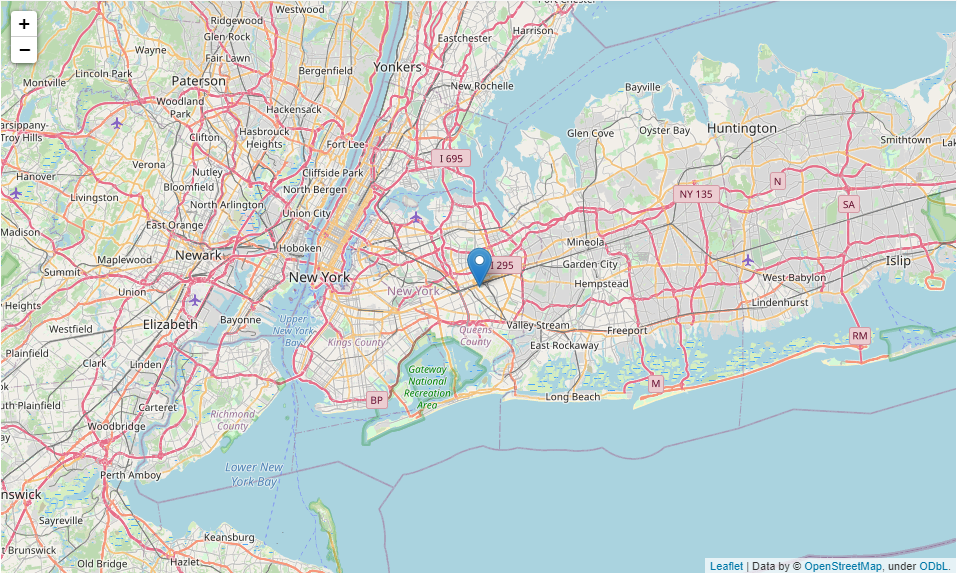

## Incidents by zip code, Choropleth Map - GeoJson Files

In [ ]:
# Creating a new DataFrame of complaints by zipcodes
complaints = nyc_311.groupby('incident_zip')[['complaint_type']].size().to_frame()
# Renaming the size column
complaints.columns = ['num']
# Create a zipcode column
# Based on the index
complaints['zip'] = complaints.index
complaints.info()

In [24]:
# Create boundaries for values
# To be colored on
vals = complaints.quantile([.1, .3, .5, .7, .9])['num']
vals = list(vals)
vals.append(complaints.num.max() + 1)
vals

[1.0, 114.0, 359.0, 596.5, 921.0, 1773]

In [30]:
import json
import requests
#url to import the geojson data from nyc
url = 'http://data.beta.nyc//dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/6df127b1-6d04-4bb7-b983-07402a2c3f90/download/f4129d9aa6dd4281bc98d0f701629b76nyczipcodetabulationareas.geojson'
#create a dictionary like object from geojson
geo_json_data = json.loads(requests.get(url).text)
#create our map
m = folium.Map([start[0], start[1]], zoom_start=9.5, tiles = 'Stamen Toner')
#add the boundaries and colors
m.choropleth(geo_json_data, data = complaints, columns = ['zip','num'],
            #this is the key from json dictionary
            key_on = 'feature.properties.postalCode',
            threshold_scale= vals,
            #these are RColorBrewer codes
            fill_color= 'BuPu')

C:\Users\Emre\miniconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [31]:
m

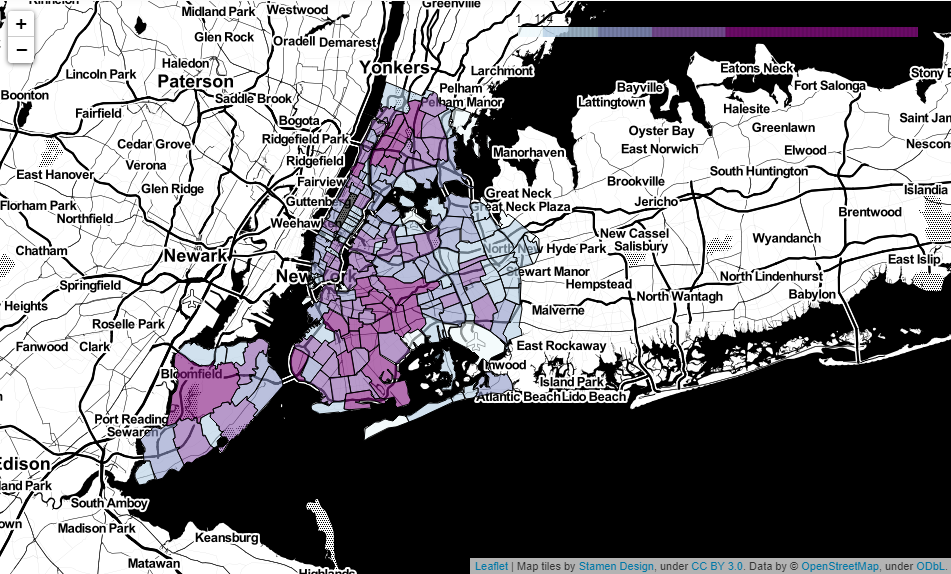